🎯 Problem Statement
Objective:
To develop a machine learning model that can predict whether a customer is likely to purchase a holiday package based on their demographic and behavioral features using a Decision Tree algorithm.

Travel companies collect extensive customer data including age, income, previous international trips, and internet usage. Analyzing this data helps businesses target potential customers more effectively.

My project will leverage this data to build a model that can classify customers into buyers and non-buyers, enabling better marketing strategies and increased sales.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Travel.csv')

In [3]:
print(df.shape)
print(df.columns.tolist())
print(df.dtypes)
df.head()

(4888, 20)
['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']
CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
De

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df['ProdTaken'].value_counts(normalize=True)

ProdTaken
0    0.811784
1    0.188216
Name: proportion, dtype: float64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.describe()


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [7]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

missing values(%):


DurationOfPitch             5.135025
MonthlyIncome               4.766776
Age                         4.623568
NumberOfTrips               2.864157
NumberOfChildrenVisiting    1.350245
NumberOfFollowups           0.920622
PreferredPropertyStar       0.531915
TypeofContact               0.511457
dtype: float64

C:\Users\rushi\AppData\Local\Temp\ipykernel_14316\1791391238.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = missing_percent.values, y = missing_percent.index  , palette ='viridis' )


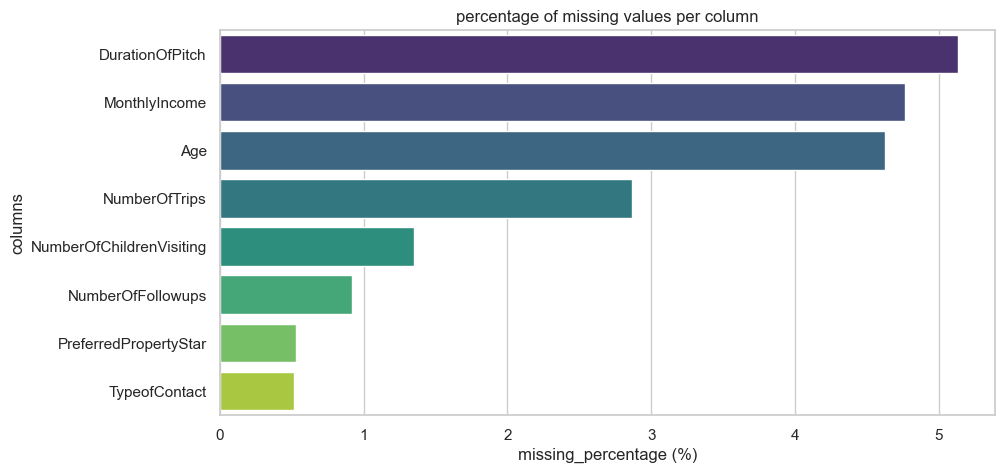

In [8]:
#percentage of missing values
missing_percent = df.isnull().mean().sort_values(ascending=False)*100
missing_percent=missing_percent[missing_percent > 0]

print("missing values(%):")
display(missing_percent)

#plotting the graphs
plt.figure(figsize=(10,5))
sns.barplot(x = missing_percent.values, y = missing_percent.index  , palette ='viridis' )
plt.title('percentage of missing values per column')
plt.xlabel('missing_percentage (%)')
plt.ylabel('columns')
plt.show()

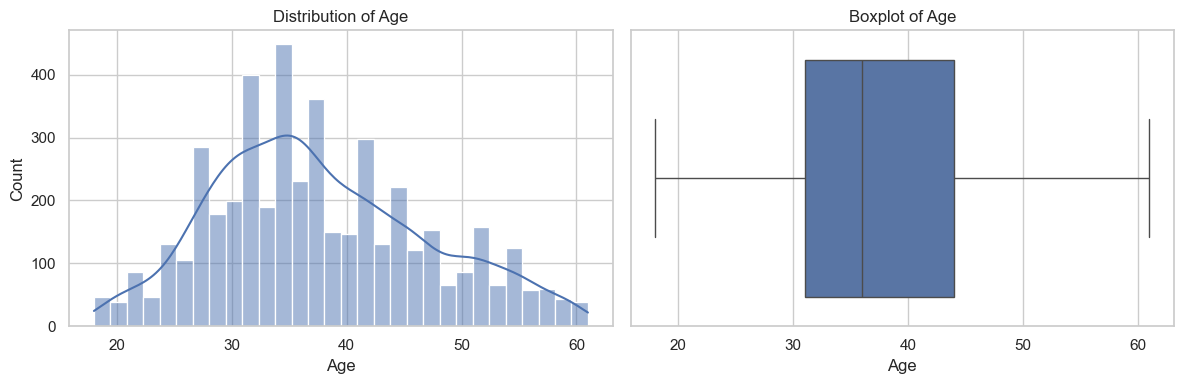

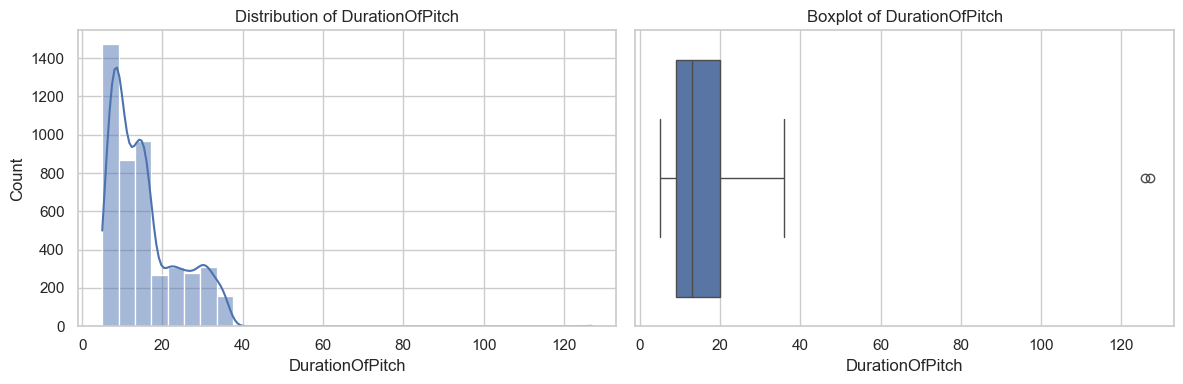

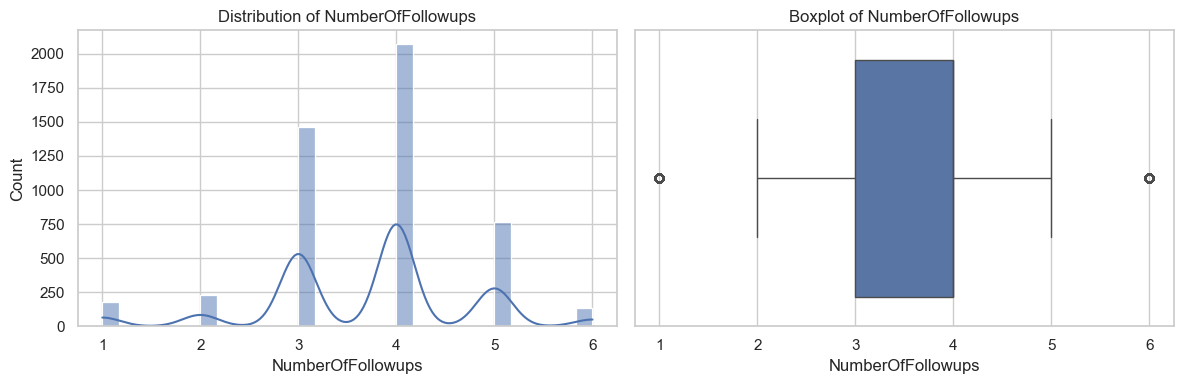

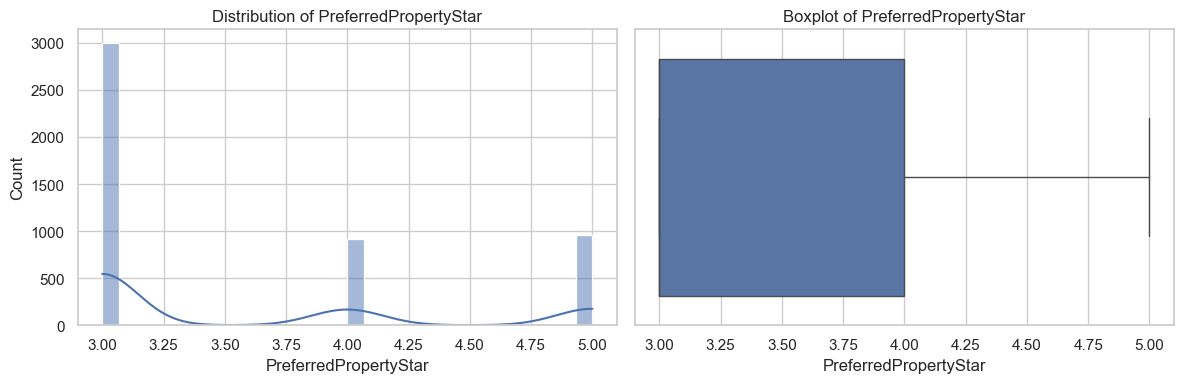

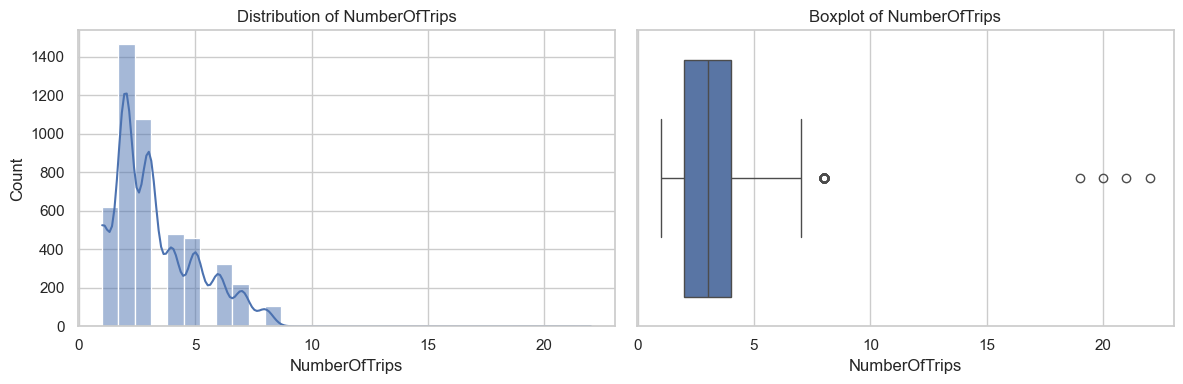

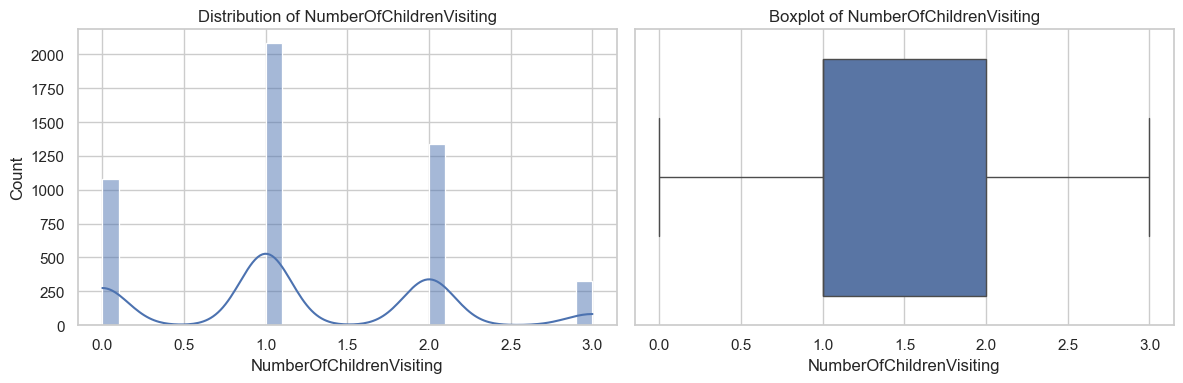

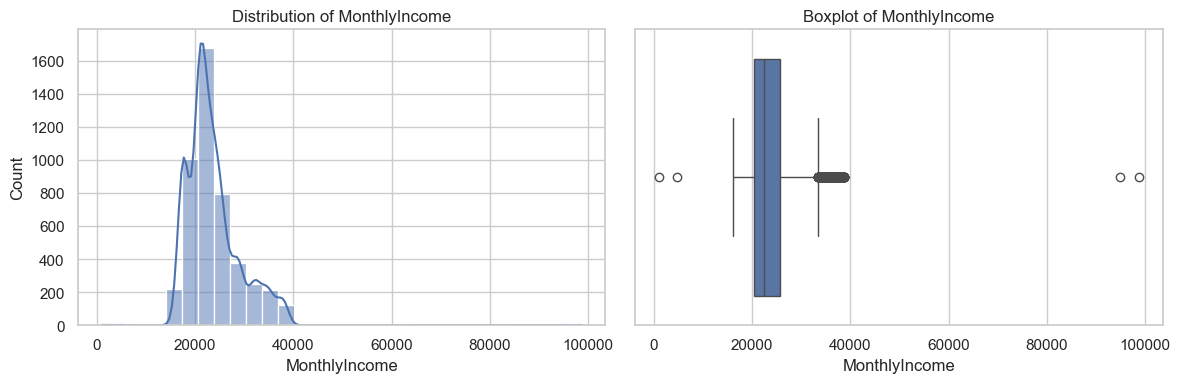

In [9]:
num_missing = df.select_dtypes(include=['float64', 'int64']).loc[:, df.isnull().any()].columns
for col in num_missing:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [10]:
#impute numerical columns with mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().sum()>0:
        df[col].fillna(df[col].mean(), inplace=True)

#impute categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum()>0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("missing values if left any :" , df.isnull().sum().sum())

missing values if left any : 0


C:\Users\rushi\AppData\Local\Temp\ipykernel_14316\4234942834.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\rushi\AppData\Local\Temp\ipykernel_14316\4234942834.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [11]:
# Make a copy of original DataFrame
df_fe = df.copy()

# 1. Create Age_Group: bin age into categories
df_fe['Age_Group'] = pd.cut(df_fe['Age'],
                            bins=[0, 18, 30, 50, 70, 100],
                            labels=['Teen', 'YoungAdult', 'Adult', 'Senior', 'Old'])

# 2. Convert Number of Trips into a binary feature: Short Trip or Long Trip
df_fe['Is_Short_Trip'] = df_fe['NumberOfTrips'].apply(lambda x: 1 if x <= 3 else 0)

# 3. Create interaction feature: Budget per Trip
df_fe['BudgetPerTrip'] = df_fe['MonthlyIncome'] / (df_fe['NumberOfTrips'] + 1)  # +1 to avoid divide-by-zero

# 4. Preview new features
df_fe[['Age', 'Age_Group', 'NumberOfTrips', 'Is_Short_Trip', 'MonthlyIncome', 'BudgetPerTrip']].head()



,Age,Age_Group,NumberOfTrips,Is_Short_Trip,MonthlyIncome,BudgetPerTrip
0,41.000000,Adult,1.0,1,20993.0,10496.500000
1,49.000000,Adult,2.0,1,20130.0,6710.000000
2,37.000000,Adult,7.0,0,17090.0,2136.250000
3,33.000000,Adult,2.0,1,17909.0,5969.666667
4,37.622265,Adult,1.0,1,18468.0,9234.000000


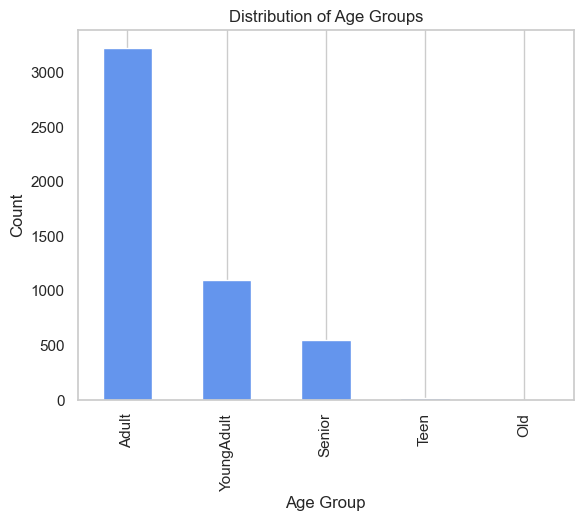

In [12]:
# Distribution of Age Groups
df_fe['Age_Group'].value_counts().plot(kind='bar', color='cornflowerblue', title='Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


Encoding and Preprocessing with ColumnTransformer

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Set target
target = 'ProdTaken'

# Define X and y
X = df_fe.drop(columns=[target])
y = df_fe[target]

# Split the data before transformation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Identify columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target if it’s still there
if target in numerical_cols: numerical_cols.remove(target)
if target in categorical_cols: categorical_cols.remove(target)

# Column Transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])


In [14]:
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['CustomerID', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'Is_Short_Trip', 'BudgetPerTrip']
Categorical Columns: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation', 'Age_Group']


Train Random Forest Classifier with ColumnTransformer (Pipeline)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on training data
rf_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Model Evaluation on Train & Test Set

Training Accuracy: 1.0000
Testing Accuracy: 0.9172

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       794
           1       0.96      0.58      0.73       184

    accuracy                           0.92       978
   macro avg       0.94      0.79      0.84       978
weighted avg       0.92      0.92      0.91       978



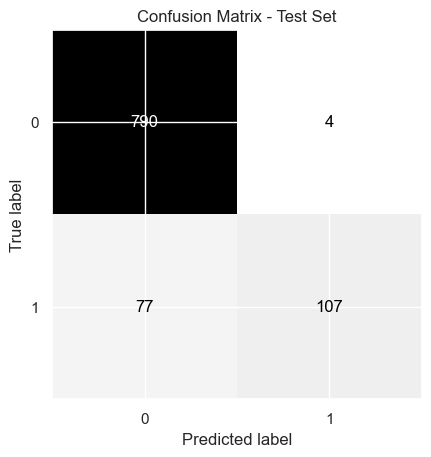

In [16]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on training and test sets
y_train_pred = rf_pipeline.predict(X_train)
y_test_pred = rf_pipeline.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    colorbar=False,
    cmap='Greys'
)
plt.title("Confusion Matrix - Test Set")
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Save the best model
best_rf_pipeline = grid_search.best_estimator_

print("Best Parameters Found:")
print(grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters Found:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


🔹 Training Accuracy: 1.0000
🔹 Testing Accuracy:  0.9162

 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       794
           1       0.96      0.58      0.72       184

    accuracy                           0.92       978
   macro avg       0.94      0.79      0.84       978
weighted avg       0.92      0.92      0.91       978



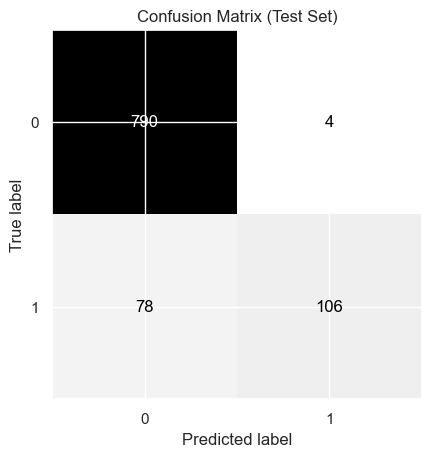

In [21]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on train and test sets using the best model
y_train_pred = best_rf_pipeline.predict(X_train)
y_test_pred = best_rf_pipeline.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"🔹 Training Accuracy: {train_acc:.4f}")
print(f"🔹 Testing Accuracy:  {test_acc:.4f}\n")

# Classification Report
print(" Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    colorbar=False,
    cmap='Greys'
)

plt.title("Confusion Matrix (Test Set)")
plt.show()


C:\Users\rushi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


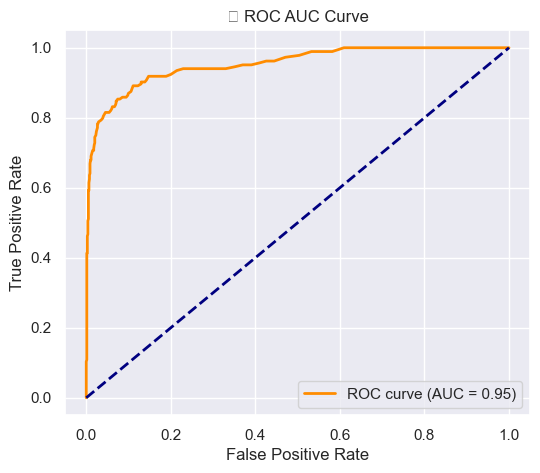

In [22]:
# Get probability predictions
y_test_proba = best_rf_pipeline.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🚀 ROC AUC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


C:\Users\rushi\AppData\Local\Temp\ipykernel_14316\2430801969.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette="viridis")
C:\Users\rushi\AppData\Local\Temp\ipykernel_14316\2430801969.py:39: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\rushi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


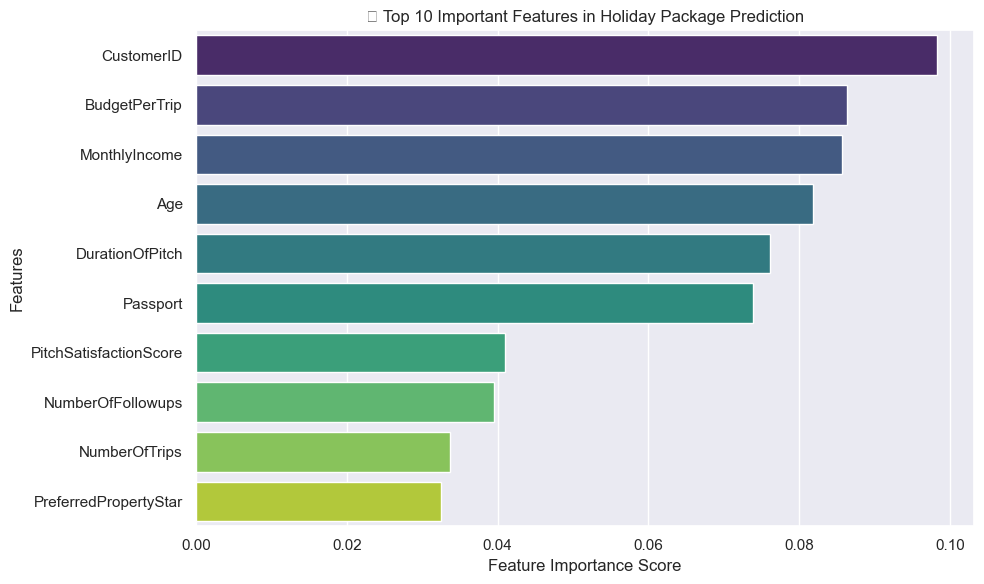

In [25]:
# Get feature names after preprocessing
preprocessor = best_rf_pipeline.named_steps['preprocessor']
model = best_rf_pipeline.named_steps['classifier']


# Get full feature names from ColumnTransformer
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, features in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = list(transformer.get_feature_names_out(features))
        else:
            names = features  # passthrough
        feature_names.extend(names)

    return feature_names

feature_names = get_feature_names(preprocessor)
importances = model.feature_importances_

# Now they will match in length ✅
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette="viridis")
plt.title("🎯 Top 10 Important Features in Holiday Package Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [29]:
import joblib

# Save the best model pipeline
joblib.dump(best_rf_pipeline, 'holiday_package_model.pkl')

print(" Model saved successfully as 'holiday_package_model.pkl'")


 Model saved successfully as 'holiday_package_model.pkl'
